# Analysis of Time Based Metrics

## Setup

In [3]:
import os
import sys
from collections import defaultdict

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
os.chdir('/users/dane/src/datatools/ipy/notebooks/pt/dev/')
sys.path.append('/users/dane/src/datatools/analytics/')


In [34]:
import pylab
pylab.rcParams['figure.figsize'] = (14,10)

# setup lists
m_int = [11002, 4352, 4367, 12277, 12976, 12169, 10701, 12006, 12172, 12152, 4058, 8876,
         11017, 3954, 8901, 11993, 6569, 3959
]
start_build = '8786.01'

In [5]:
import django
os.environ.setdefault("DJANGO_SETTINGS_MODULE", "analytics.settings")
django.setup()

import pertest.util
from pertest.util import *

## x

In [35]:
df = get_df_db(m_int)
df.head()

,m_id,m_name,test_case,cseq,mean,upper,lower,meas_type,m_value,t_value,passed,build,seq,t_id,exception
0,4367,AxPerf:All$T,ground_with_cutouts@base_16,0,15.178833,0.194307,0.455365,MEAN_ABS,None,15.146700,1,8759.10,0,3980846,0
1,3959,DesEnv:Time(s)$T,tt18234_MMIC_SPDT_Switch_10GHz@sim_time,0,2.546354,0.202411,0.263871,MEAN_ABS,None,3.019531,0,8759.10,0,3981943,0
2,4352,AxPerf:Total_Exe$T,ground_with_cutouts@base_16,0,15.223800,0.194100,0.456714,MEAN_ABS,None,15.193600,1,8759.10,0,3982345,0
3,4367,AxPerf:All$T,ground_with_cutouts@base_16,0,15.178833,0.194307,0.455365,MEAN_ABS,None,15.146700,1,8759.10,0,3982333,0
4,3954,DesEnv:Time(s)$T,AWR_DRC_25x25@drc_time,0,16.380151,0.116014,0.491405,MEAN_ABS,None,16.378906,1,8759.10,0,3981938,0


In [36]:
wide = pd.pivot_table(df, index='build', columns='m_id', values='t_value')

In [37]:
wide.corr()

m_id,3954,3959,4058,4352,4367,6569,8876,8901,10701,11002,11017,11993,12006,12152,12169,12172,12277,12976
m_id,,,,,,,,,,,,,,,,,,
3954,1.000000,0.054811,-0.057813,0.033441,0.033623,-0.016657,-0.027405,-0.031896,-0.072615,0.046835,0.054925,-0.110142,0.073649,0.231471,0.246944,0.248369,0.023080,0.057313
3959,0.054811,1.000000,0.187684,0.067714,0.065916,0.055162,0.095210,0.002455,0.029560,0.297443,0.292643,0.059497,0.051923,0.009733,-0.013961,-0.017475,0.204328,0.064608
4058,-0.057813,0.187684,1.000000,0.011173,0.006779,-0.005082,0.100103,-0.004358,0.102359,0.373456,0.338105,0.132226,0.034906,0.108474,0.033175,0.030554,0.424791,0.033728
4352,0.033441,0.067714,0.011173,1.000000,0.999975,0.138405,0.042813,0.046093,0.014121,0.085307,0.087768,-0.025422,-0.089978,0.002229,-0.001870,-0.002861,0.176207,0.091915
4367,0.033623,0.065916,0.006779,0.999975,1.000000,0.138060,0.042240,0.045219,0.013323,0.081230,0.084013,-0.026130,-0.090486,0.001003,-0.002495,-0.003483,0.172994,0.091497
6569,-0.016657,0.055162,-0.005082,0.138405,0.138060,1.000000,0.085797,0.055338,0.001743,0.154915,0.155664,-0.025508,0.028746,0.069485,0.052862,0.050104,0.073573,-0.027608
8876,-0.027405,0.095210,0.100103,0.042813,0.042240,0.085797,1.000000,0.250455,0.036856,0.140142,0.138226,-0.155482,-0.083715,-0.040506,-0.065055,-0.067478,0.115503,-0.088717
8901,-0.031896,0.002455,-0.004358,0.046093,0.045219,0.055338,0.250455,1.000000,0.007795,0.192566,0.191786,-0.113009,-0.146794,0.040087,0.015077,0.012731,0.055218,-0.061368
10701,-0.072615,0.029560,0.102359,0.014121,0.013323,0.001743,0.036856,0.007795,1.000000,0.040250,0.037011,-0.049084,0.019345,0.018339,0.013147,0.014959,0.019771,0.052546


In [41]:
df['value'] = df.t_value
pertest.util.df = df

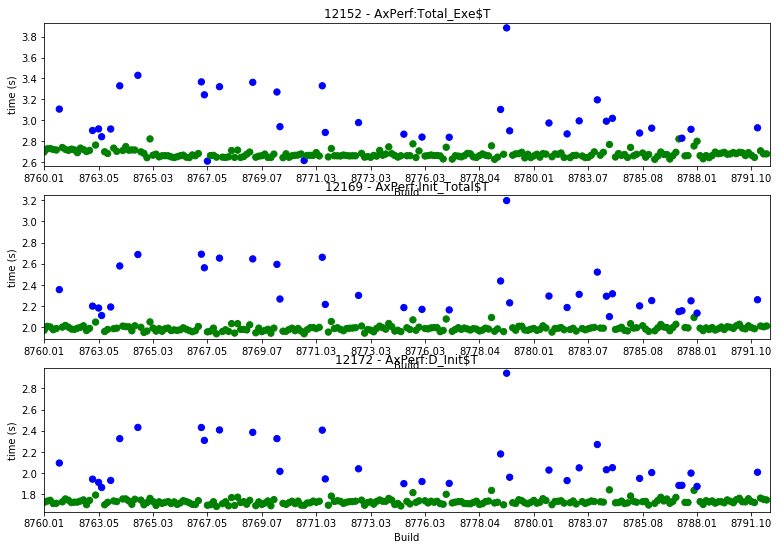

In [44]:
plotm([12152, 12169,12172])

These seem like acceptable exceptions so we **can set all metrics with initial means < 32ms to VAL_UB=64ms**.

For metrics with means between 32ms and 100ms let's set a value of 32ms above the mean as the limit and see how many failures we have.

ns_mid = ns[(ns.f15mean > .032) & (ns.f15mean < .1)]
print('The number of metrics with means between 32 and 100ms is', len(ns_mid))
ml=ns_mid[ns_mid['max'] > (ns_mid.f15mean + .032)]
print('Of those,', len(ml), 'have at least 1 points more than 32ms above the mean')
sample = [75567, 75866, 77238]
plotm(sample)